In [1]:
### Data Exploration
### Data Cleaning
### Data Processing
###
### Credits: Dr. Ami Gates, https://gatesboltonanalytics.com/ 

### This examples uses the Kaggle Titanic Training dataset. 
### This code shows how to read in a csv file and begin
### some cleaning options.

import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Record Data

In [2]:
## Data *always* needs to be cleaned and prepared
## And we'll be using Titanic Dataset to do this
## Original Data Source: https://www.kaggle.com/sudhirtk/titanic-train-dataset

##### Bring the data in using pandas
def get_data(fn):
    df = pd.read_csv(filename)
    return df

filename="Titanic_Kaggle_Train_Data.csv"
df = get_data(filename)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# df.shape
# df.columns
# df.iloc[0]

## Dropping Unusable Fields

In [4]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
## I notice right away that Cabin has a lot of 
## NaN values *and* does not contain information
## that I need. I also do not want to keep Ticket.

############  DROP a COLUMN
drop_these = ["Cabin", "Ticket"]
df.drop(drop_these, inplace=True, axis=1)
## axis = 0 are the rows

## Let's see what this did - you will see that we now have only 10 cols
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [6]:
df.columns[3]

'Name'

In [7]:
## We can also use the column number
## The "Name" column is column 3. Recall that Python starts at 0
## Let's drop the Name column as well
cols=[3]
df.drop(df.columns[cols], inplace=True, axis=1)
df.head(10)
## Now we have 8 columns remaining

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


## Correcting fields

In [8]:
##############  GET THE TYPES OF EACH COLUMN/VARIABLE
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object


In [9]:
## The next steps include looking at each variable individually
## We will determine if it has the type we want, or if it needs 
## to change. 

### PassengerId has type int64
### An ID is not numeric and so should not be an integer type.
### We can change this to character as it is a name of sorts
### but *NOT* a category.
## Do not forget - you must asign the df to the new type
df["PassengerId"]= df["PassengerId"].astype(str)
print(df.dtypes)

PassengerId     object
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object


In [10]:
### The "Survived " column is very important. Why?
## This column offers a *label* for this dataset
## Because this is labeled data, supervised methods can 
## be applied to it later. 

###          !!!!!!!!!! IMPORTANT !!!!!!!!!!!!     ##

## To use a label to train any ML methods, the label should
## be a "factor" / "category" data type. Not numeric or char, etc.

## So, let's change "Survived" from int64 into a factor
## NOTES:
## category is a pandas data type 
## corresponding to categorical variables in statistics.
## A categorical variable takes on a limited, and usually fixed, 
## number of possible values (called levels in R)
## All values of categorical data are either in categories or np.nan

df["Survived"] = df["Survived"].astype('category')
print(df.dtypes)

PassengerId      object
Survived       category
Pclass            int64
Sex              object
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked         object
dtype: object


In [11]:
df["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]

In [12]:
## Now, we can move a bit faster....let's find all the variables
## that should be categories and change them all at once
df["Sex"] = df["Sex"].astype('category')
df["Pclass"] = df["Pclass"].astype('category')
df["Embarked"] = df["Embarked"].astype('category')
print(df.dtypes)

PassengerId      object
Survived       category
Pclass         category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object


In [13]:
### Next, I see that "Age" is a float64 or 64 bit decimal value
## This is fine. Age is a numeric value, as is SibSp and Fare
## So - the data types have now been successfully corrected.

## Missing Values

In [14]:
## Missing values find there way into many places.
## A good first step is to explore  - see how many are there

## Get a list of all the column names
ColumnNamesList = df.columns.values
print(ColumnNamesList)

['PassengerId' 'Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare'
 'Embarked']


In [15]:
## Print the number of missing values in all variables
for name in ColumnNamesList:
    total_nas=df[name].isna().sum()
    print(name, ":", total_nas)

PassengerId : 0
Survived : 0
Pclass : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Fare : 0
Embarked : 2


In [16]:
## From the results, we see that PassengerId, Pclass, Survived, 
## Sex, and Fare have no missing values. That is very good and 
## unusual. 

## However, "Age" has 177 missing values! That's a lot
## This means that 177 NA values is 177/891 or about 20%
## We have some options.
## First, we can remove all the rows with missing values. 
## If we do this, we lose about 20% of the data - not great!
## We can replace the values with a mean or median.
## This is risky - especially if Age is critical to the 
## analysis. 

## Because this is a tutorial - I will offer two examples:
## 1) We will remove all rows for which "Age" is NaN
## 2) We will replace the NaN values under Embark with the *mode*

### FIrst - update the NaNs under Embark to be the mode
print(df.Embarked, '\n')
TheMode=stat.mode(df.Embarked)
print("Mode:", TheMode)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: category
Categories (3, object): ['C', 'Q', 'S'] 

Mode: S


In [17]:
## Pandas provides the fillna() function for replacing missing 
## values with a specific value.
df.Embarked.fillna(TheMode, inplace=True)
## Count the NaN's again...
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64


In [18]:
## OK - so far so good. Now we need to worry about the 177 NaN
## values under the Age column.

## In some cases, one might choose to retain these rows and 
## replace the missing values with the mean or median.
## However, Titanic data (and survival) is correlated to Age
## and we do not want to lose that!

## So, we will drop all row with NaN
df.dropna(inplace=True)
## Check it now
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


## Incorrect values

In [19]:
## The steps above are often easier. 
## Incorrect values are harder to find and harder to fix
## As a first step, let's explore the data

# Percentile: The pth percentile of a distribution is a number such 
#             that approximately p percent (p%) of the values in the  
#             distribution are equal to or less than that number

#### Step 1 - Look at each variable and some basics stats and vis
print(df.columns.values)
df.describe()

['PassengerId' 'Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare'
 'Embarked']


,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000
mean,29.699118,0.512605,0.431373,34.694514
std,14.526497,0.929783,0.853289,52.918930
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,8.050000
50%,28.000000,0.000000,0.000000,15.741700
75%,38.000000,1.000000,1.000000,33.375000
max,80.000000,5.000000,6.000000,512.329200


In [20]:
df=df[df.Age > 1]

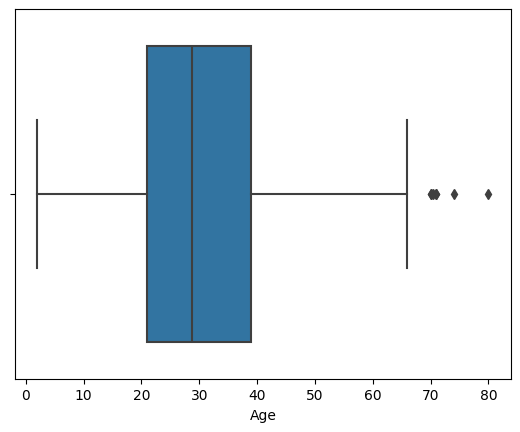

/Users/niha9132/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/niha9132/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


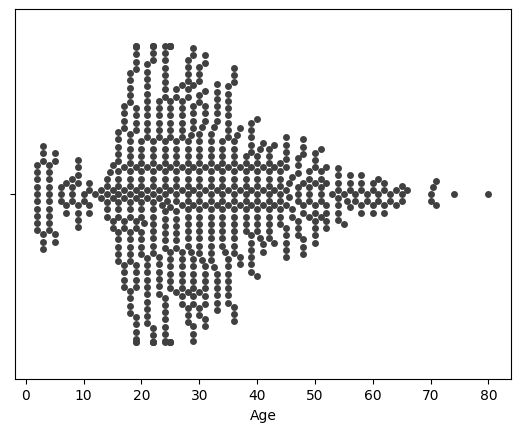

In [21]:
plot1=sns.boxplot(x="Age",data=df)
plt.show()
plot2=sns.swarmplot(x="Age",  data=df, color=".25")
plt.show()

In [22]:
## Look at the min for Age!
## This is .42. Assuming Age<1 are some incorrect values
## we will need to remove those rows.

## Remove any ages below 1 
## Because the max Age is 80  - we are OK there

df.describe().map('{:,.2f}'.format)

,Age,SibSp,Parch,Fare
count,700.00,700.00,700.00,700.00
mean,30.28,0.49,0.41,34.72
std,14.08,0.91,0.85,53.22
min,2.00,0.00,0.00,0.00
25%,21.00,0.00,0.00,8.05
50%,28.75,0.00,0.00,15.37
75%,39.00,1.00,1.00,33.00
max,80.00,5.00,6.00,512.33


## Outliers

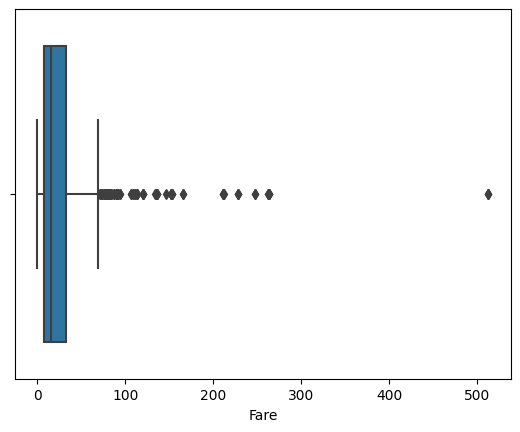

In [23]:
## Look at all of the other variables to see if there are any issues

## The Fare is interesting...the max is very large - let's 
## use a boxplot to take a closer look
plot3=sns.boxplot(x="Fare",data=df)
plt.show()
## We have some outliers!
## Let's count up the Fares that many deviations above the mean
## The "many" is subjective. I am playing safe

In [24]:
df[df.Fare > 300]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,259,1,1,female,35.0,0,0,512.3292,C
679,680,1,1,male,36.0,0,1,512.3292,C
737,738,1,1,male,35.0,0,0,512.3292,C


In [25]:
## There are three Fares that are above $400 - let's remove these rows
df=df[df.Fare < 300]
df.describe()
## This is good. We only removed three rows and the new max is 
## almost half the size it was before

,Age,SibSp,Parch,Fare
count,697.000000,697.000000,697.000000,697.000000
mean,30.253945,0.496413,0.411765,32.660001
std,14.107019,0.908328,0.848277,43.094754
min,2.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,8.050000
50%,28.500000,0.000000,0.000000,15.245800
75%,39.000000,1.000000,1.000000,32.320800
max,80.000000,5.000000,6.000000,263.000000


/Users/niha9132/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


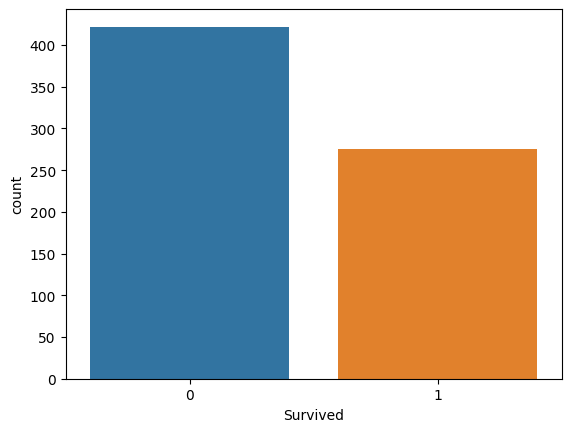

/Users/niha9132/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


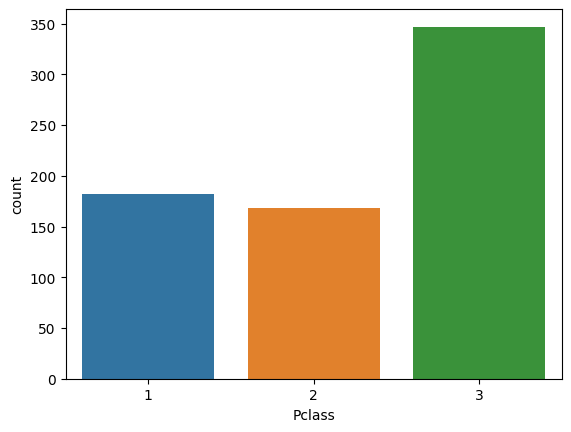

/Users/niha9132/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


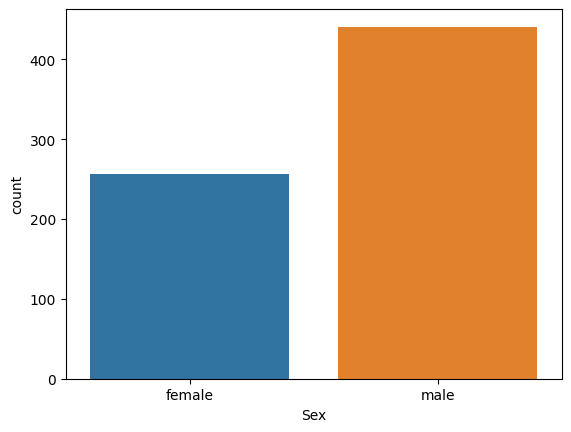

In [26]:
## Let's make some plots for the non-numeric variables....

sns.countplot(x="Survived",data=df)
plt.show()

sns.countplot(x="Pclass",data=df)
plt.show()

sns.countplot(x="Sex",data=df)
plt.show()

## Data Remapping

In [27]:
## Create a dummy dataset of students and their test scores
## The idea is to remap these scores such that we bin them to letter grades

data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "Score": [90, 85, 80, 75, 50]
}

df = pd.DataFrame(data)
df

,Name,Score
0,Alice,90
1,Bob,85
2,Charlie,80
3,David,75
4,Eva,50


In [28]:
# A function which given a score, bin them to a letter grade.

def get_grade(score):
    if score>90:
        return 'A'
    
    elif score>80:
        return 'B'
    
    elif score>70:
        return 'C'

    else:
        return 'F'

In [29]:
df["Grade"] = df["Score"].apply(get_grade)
df

,Name,Score,Grade
0,Alice,90,B
1,Bob,85,B
2,Charlie,80,C
3,David,75,C
4,Eva,50,F
